In [1]:
from tensorflow import keras
from tensorflow.keras import datasets,utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation,Flatten,Dropout

def make_data():
    (X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
    y_train=utils.to_categorical(y_train)
    y_test=utils.to_categorical(y_test,10)
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train/=255
    X_test/=255
    return (X_train,y_train),(X_test,y_test)

In [2]:
from tensorflow.keras import optimizers

def make_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding="same",input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    opt=optimizers.RMSprop(lr=0.0001, decay=1e-6)
    model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model

In [3]:
import matplotlib.pyplot as plt
a=isinstance(1,int)
b=isinstance(1.2,float)

def plot_loss(history, title=None):
    if not isinstance(history,dict):
        history=history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])

    if title is not None:
        plt.title(title)
    plt.ylabel("손실") 
    plt.xlabel("에포크") 
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0) 

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [4]:
(X_train,y_train),(X_test,y_test)=make_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train.shape[1:]

(32, 32, 3)

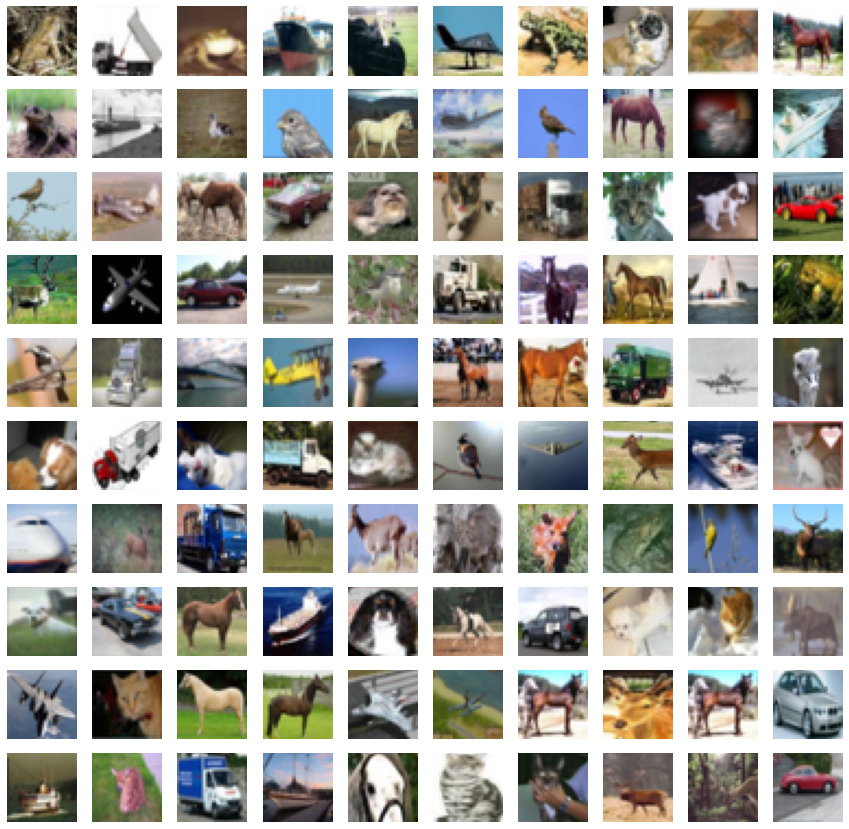

In [7]:
from six.moves import cPickle
import numpy as np

f=open("c:/users/qps98/.keras/datasets/cifar-10-batches-py/data_batch_1","rb")
datadict=cPickle.load(f, encoding='latin1')
X=datadict["data"]
y=datadict["labels"]
X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
y=np.array(y)

fig, axes1=plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i=np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [8]:
model=make_model()

In [9]:
history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 77s 61ms/step - loss: 1.9782 - accuracy: 0.2727 - val_loss: 1.5619 - val_accuracy: 0.4403
Epoch 2/3
1250/1250 [==============================] - 79s 64ms/step - loss: 1.5455 - accuracy: 0.4425 - val_loss: 1.4768 - val_accuracy: 0.4684
Epoch 3/3
1250/1250 [==============================] - 77s 62ms/step - loss: 1.4256 - accuracy: 0.4859 - val_loss: 1.3205 - val_accuracy: 0.5334


In [10]:
performance_test=model.evaluate(X_test,y_test,batch_size=100)
print(performance_test)

100/100 [==============================] - 3s 27ms/step - loss: 1.3088 - accuracy: 0.5310
[1.308781385421753, 0.531000018119812]


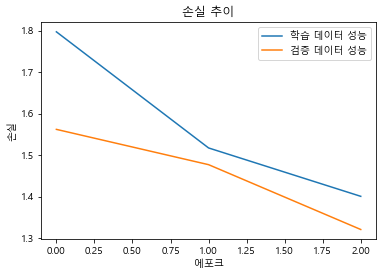

In [11]:
import matplotlib
import matplotlib.font_manager as fm
font_location="c:/windows/fonts/malgun.ttf"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc("font",family=font_name)
plot_loss(history,"손실 추이")
plt.show()

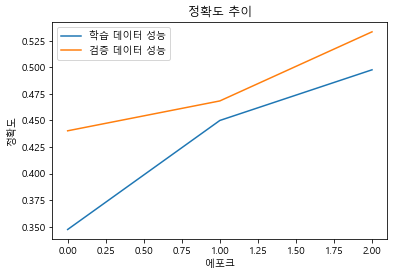

In [12]:
plot_acc(history,"정확도 추이")
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred)
df_cm=pd.DataFrame(cm,range(10),range(10))
df_cm

313/313 [==============================] - 5s 15ms/step


,0,1,2,3,4,5,6,7,8,9
0,488,35,57,26,18,30,21,18,235,72
1,33,570,8,11,9,15,20,17,78,239
2,66,15,350,60,146,152,85,62,35,29
3,13,12,65,269,73,330,109,68,19,42
4,27,5,122,59,437,104,101,107,18,20
5,12,4,73,110,56,579,47,87,16,16
6,3,7,64,61,114,56,622,34,12,27
7,17,1,29,44,77,143,37,590,11,51
8,73,49,12,18,8,17,9,16,734,64
9,29,83,13,15,7,23,38,40,81,671


In [14]:
model.save('c:/data/cifar')

INFO:tensorflow:Assets written to: c:/data/cifar\assets
